In [1]:
from bs4 import BeautifulSoup
from bs4 import NavigableString
import re
import string
import nltk.tree
import nltk.tokenize
import nltk.corpus
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.tokenize import TweetTokenizer
from nltk.tree import *
import csv
import pandas as pd
import collections
import urllib2
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
def removeRepeatedSequence(word):
    pattern = re.compile(r'(.)\1{1,}',re.DOTALL)
    return pattern

In [24]:
def clean_tweet(tweet):
    #remove urls
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'pic.twitter\S+', '', tweet)
    
    #remove hashtags and mentions
    #tweet = re.sub(r'#\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    
    
    return tweet
    """#Remove stop-words and punctuation
    stopset = stopwords.words('english') + list(string.punctuation)
        
    tokeniser = TweetTokenizer()
    tweet_tokens = tokeniser.tokenize(tweet.lower())
    tokens = [i for i in tweet_tokens if i not in stopset and len(i) > 2]

     
    #Stemming
    #porter_stemmer = PorterStemmer()
    #tokens = [porter_stemmer.stem(token) for token in tokens]
    
    #Lemmanisation
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    
    #Slang lookup
    tweet_tokens = []
    
    for i in range(len(tokens)):
        if tokens[i] in slang_dict:
            abbrev = slang_dict[tokens[i]].split()
            abbrev = [j for j in abbrev if j not in stopset and len(j)>2]
            tweet_tokens.append(abbrev)
        else:
            tweet_tokens.append(tokens[i])
    del tokens
            
    return tweet_tokens"""

    
    

In [52]:
tweets = pd.read_csv('GetOldTweets-python/output_got_Dec.csv', delimiter='\t', quotechar='"')

In [53]:
text = tweets['text']
text = text.str.decode('utf-8')
text = text.str.encode('ascii', errors='ignore')

In [54]:
text_clean = text.apply(clean_tweet)

In [55]:
indexes = []
for i in range(len(text_clean)):
    tokens = text_clean[i].split()
    
    if len(tokens) < 3:
        indexes.append(i)
    for x in tokens:
        if x.isdigit():
            text_clean[i] = text_clean[i].replace(x, '')
    text_clean[i] = str(text_clean[i]).strip()
    text_clean[i] = re.sub(r'\s+', ' ', text_clean[i])
    
text_clean.drop(indexes, inplace=True)
del indexes

In [48]:
tweets['text'] = text_clean
print tweets

               username              date  retweets  favorites  \
0          ganeshstweet  2016-12-30 05:28         0          0   
1              TRexModi  2016-12-30 05:27         0          0   
2       deepforever2009  2016-12-30 05:26         2          1   
3            Mohitmsood  2016-12-30 05:21         0          1   
4          ganeshstweet  2016-12-30 05:19         0          0   
5             _St_Joel_  2016-12-30 05:18         0          0   
6                  np_s  2016-12-30 05:18         0          0   
7            Mohitmsood  2016-12-30 05:12         0          1   
8            UrbanAsian  2016-12-30 05:10         0          1   
9          rohan_bendre  2016-12-30 05:03         0          0   
10        danielkarthic  2016-12-30 04:58         0          0   
11            shivsoham  2016-12-30 04:56         0          0   
12           solarsarma  2016-12-30 04:54         0          0   
13           indiacause  2016-12-30 04:53         0          0   
14        

In [56]:
analyzer = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:analyzer.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:analyzer.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:analyzer.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:analyzer.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

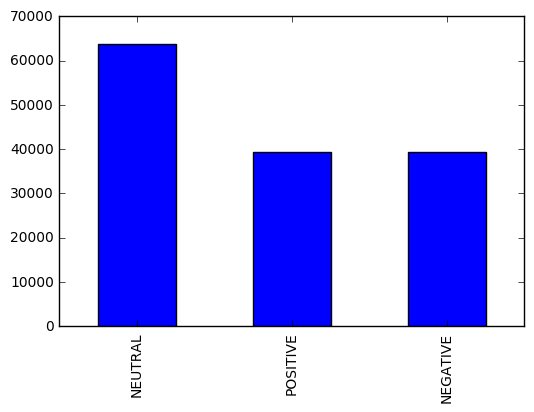

In [57]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="")
plt.show()

In [58]:
print tweets.head(5)

          username              date  retweets  favorites  \
0     ganeshstweet  2016-12-30 05:28         0          0   
1         TRexModi  2016-12-30 05:27         0          0   
2  deepforever2009  2016-12-30 05:26         2          1   
3       Mohitmsood  2016-12-30 05:21         0          1   
4     ganeshstweet  2016-12-30 05:19         0          0   

                                                text  geo mentions  \
0  Post #DeMonetisation Govt. to roll out massive...  NaN      NaN   
1  The Black Money himself has spoken ! #DeMoneti...  NaN      NaN   
2  Modi got 107 seats out of 123.. it shows peopl...  NaN      NaN   
3  BJP के गुण्डे देश को चले लूटने पहले नादिरशाह आ...  NaN      NaN   
4  Post #DeMonetisation, till Dec 28 Income Tax D...  NaN      NaN   

          hashtags                  id  \
0  #DeMonetisation  814621754869981184   
1  #DeMonetisation  814621338836942848   
2  #DeMonetisation  814621128840871937   
3  #DeMonetisation  814619983586041861   
4 

In [61]:
#from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 6.0)

tweets['hour'] = pd.DatetimeIndex(tweets['date']).hour
tweets['date'] = pd.DatetimeIndex(tweets['date']).date
tweets['minute'] = pd.DatetimeIndex(tweets['date']).minute
dt=(tweets.groupby('date',as_index=False).sentiment_compound_polarity.mean())
print dt

          date  sentiment_compound_polarity
0   2016-11-28                     0.024614
1   2016-11-29                     0.028985
2   2016-11-30                     0.002695
3   2016-12-01                    -0.005226
4   2016-12-02                    -0.011138
5   2016-12-03                     0.009066
6   2016-12-04                     0.012193
7   2016-12-05                    -0.008610
8   2016-12-06                    -0.018645
9   2016-12-07                    -0.029028
10  2016-12-08                    -0.027796
11  2016-12-16                    -0.004377
12  2016-12-17                     0.023590
13  2016-12-18                    -0.028521
14  2016-12-19                    -0.018837
15  2016-12-20                    -0.011117
16  2016-12-21                    -0.016878
17  2016-12-22                    -0.017381
18  2016-12-23                    -0.026954
19  2016-12-24                    -0.010576
20  2016-12-25                     0.010919
21  2016-12-26                  

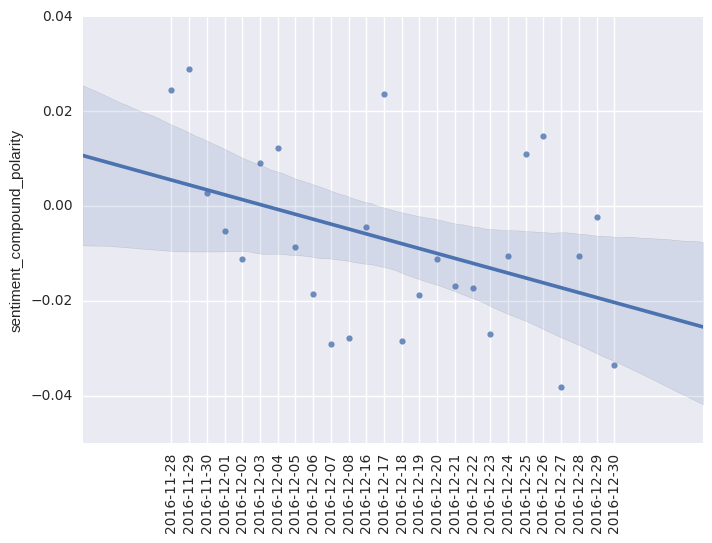

In [81]:
import seaborn as sns
import numpy as np

sns.regplot(x=np.arange(len(dt)),y=dt['sentiment_compound_polarity'])
xticks = plt.xticks(range(len(dt)), dt['date'], rotation='vertical')

In [68]:
tweets[['text', 'sentiment_type']].to_csv('labels.csv', sep='\t', quotechar='"', index=False)